In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

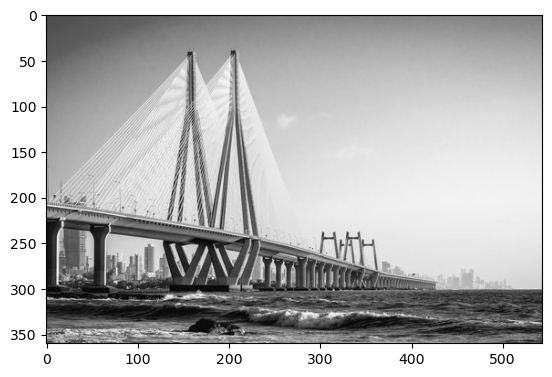

In [55]:
img = cv.imread('sea_link.jpg', 0)
plt.imshow(img, cmap = 'gray')

# Averaging Filter

In [56]:
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, size=image.shape)
    noisy_image = image + noise
    return noisy_image

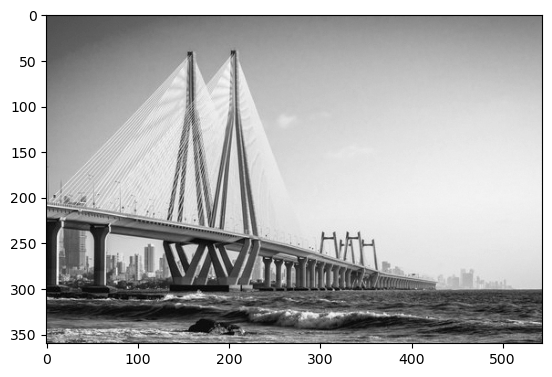

In [57]:
noisyImg = add_gaussian_noise(img)
plt.imshow(noisyImg, cmap = 'gray')

In [58]:
def conv(img, mask):
    rows, cols = img.shape
    ans = []

    for i in range(rows - 2):
        tempRow = []
        for j in range(cols - 2):
            pixel = 0
            for k in range(3):
                for l in range(3):
                    pixel += img[i + k, j + l] * mask[k, l]
            tempRow.append(pixel)
        ans.append(tempRow)

    return np.array(ans)

In [59]:
avgMask= np.array([[1/9,1/9,1/9], 
        [1/9,1/9,1/9],
        [1/9,1/9,1/9]
        ], dtype = object)

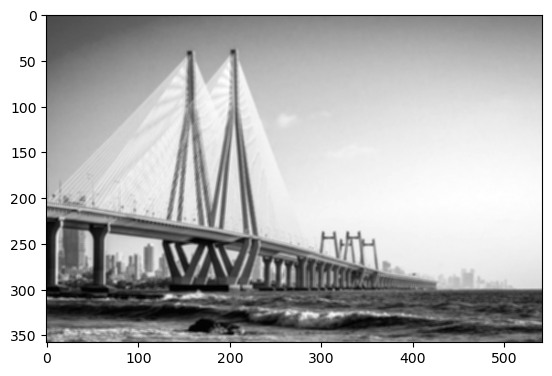

In [60]:
avgFilteredImg = conv(noisyImg, avgMask)
plt.imshow(avgFilteredImg, cmap = 'gray')

# Median Filtering

In [66]:
def saltNpepper(img):
    noisy_img = np.copy(img)
    rows, cols = img.shape
    num_pixels = int(0.005 * rows * cols)  # Number of pixels to add noise to

    rand_indices_salt = np.random.randint(0, rows, num_pixels), np.random.randint(0, cols, num_pixels)
    noisy_img[rand_indices_salt] = 255  # Set randomly selected pixels to maximum intensity (salt)
    
    rand_indices_pepper = np.random.randint(0, rows, num_pixels), np.random.randint(0, cols, num_pixels)
    noisy_img[rand_indices_pepper] = 0  # Set randomly selected pixels to maximum intensity (salt)
    
    return noisy_img

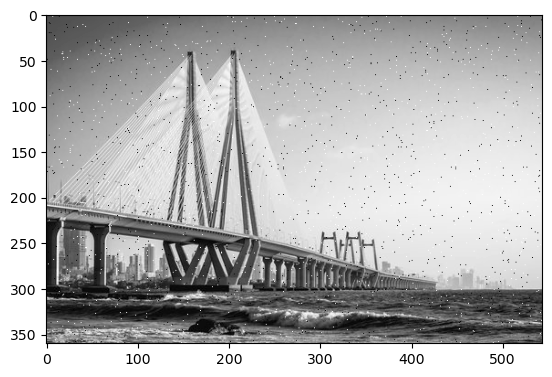

In [67]:
namkeen = saltNpepper(img)
plt.imshow(namkeen, cmap = 'gray')

In [74]:
def median_filtering(img):
    rows, cols = img.shape
    filtered_img = [[0 for _ in range(cols)] for _ in range(rows)]
    
    for x in range(1,rows - 1):
        for y in range(1, cols - 1):
            neighborhood = []
            for i in range(x - 1, x + 2):
                for j in range(y - 1, y + 2):
                    neighborhood.append(img[i][j])
            sorted_neighborhood = sorted(neighborhood)
            filtered_img[x][y] = sorted_neighborhood[4]

    return filtered_img

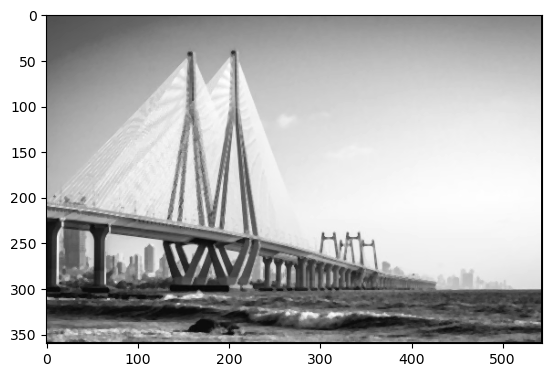

In [75]:
medianFilteredImg = median_filtering(img)
plt.imshow(medianFilteredImg, cmap = 'gray')